**Introduction**

Let's imagine for a moment that there is someone who wants to open an Italian or Asian restaurant in a French region. However, he has difficulty in choosing the ideal location, because it is very difficult for him to determine in which neighborhoods is appropriate to open a successful restaurant.
First, because the person needs to know the different restaurants that exist in France and their number in order to determine which ones are popular and dominant?
Secondly, he needs to know what the respective associated culinary specialties are.
And finally, he will need to know how much competition there is among these restaurants in France?

**Source of Data: Wikipedia and the Foursquare API:**

We got our Dataframe from Wikipedia, from this link https://bit.ly/3gmdlkr, and geospatial data via the Foursquare API.

**Structure methodologies:** 

In order to help our friend to make a good decision in the choice of his future restaurant, we will first proceed methodically to locate, with the help of Wikipedia data and Foursquare data , the neighborhoods of Paris to determine what type of company can be found there....
Then we will represent, on a vertical bar chart, the level of popularity by type of culinary specialty of the restaurants already present in Paris.
Finally, using an unsupervised machine learning method (the K-means method), we will group the different common places where restaurants and other businesses are located, from the most popular to the least popular, in order to help our friend identify in which places his future restaurant will be appropriate

**Results:**

Our work begins with a collection of our data in two places: a Wikipedia link that redirects to a table of data on the different districts and arrondissements of Paris, and geolocation data obtained through the Foursquare API
We transformed our data into Dataframe
 This Dataframe was then used to create an overlay map that represents the districts and boroughs of Paris around Château Rouge
Then, we used the Foursquare API to categorize the location of each neighborhood but also the different type of businesses (Restaurants, hotels ...) based on 100 places within a radius of 500 meters. 
And then, we represented, on a vertical bar diagram, the level of popularity of restaurants according to their respective culinary specialties in Paris.
To better calculate our statistics, we used one-hot encoding: this allowed us to explore the categories of the location by calculating the average frequency of occurrence of each category
We also computed the frequency for each neighborhood's place category
To determine the ideal k, we first used the silhouette method: it makes us reveal a number k of clusters equal to 2. 
We thus obtained 2 clusters for our neighborhoods and the 10 best sites using k-means
We examined each cluster


In [ ]:
!pip install bs4
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import seaborn as sns


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.metrics import silhouette_score

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [ ]:
url = "https://en.wikipedia.org/wiki/Arrondissements_of_Paris" # A source of data

In [ ]:
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
tables = soup.find_all('table')

In [ ]:
df_paris = pd.read_html(str(tables[1]), flavor='bs4')[0]
df_paris

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor (2020-2026)
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD)
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR)
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR)
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR)
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),60071,27556,1901,Delphine Bürkli (DVD)
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),90836,31431,1881,Alexandra Cordebard (PS)


In [ ]:
df_paris.drop(df_paris.columns[[0,2,6]], axis=1, inplace=True) 
df_paris

,Name,Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population
0,Louvre,100196,17924,before 1861
1,Bourse,100196,17924,before 1861
2,Temple,100196,17924,before 1861
3,Hôtel-de-Ville,100196,17924,before 1861
4,Panthéon,59631,23477,1911
5,Luxembourg,41976,19524,1911
6,Palais-Bourbon,52193,12761,1926
7,Élysée,37368,9631,1891
8,Opéra,60071,27556,1901
9,Entrepôt,90836,31431,1881


In [ ]:
df_paris['Density (2017)(inhabitants per km2)'] = df_paris['Density (2017)(inhabitants per km2)'].str.replace(',', '').replace({'8657¹21729²':'865721729',
                                                                                                                                '9169³190544':'9169190544'})
df_paris['Peak of population'] = df_paris['Peak of population'].str.replace('before', '')

df_paris.rename(columns={'Population(2017 estimate)':'Population(2017)','Density (2017)(inhabitants per km2)':'Density(2017)'},inplace=True)

In [ ]:
df_paris

,Name,Population(2017),Density(2017),Peak of population
0,Louvre,100196,17924,1861
1,Bourse,100196,17924,1861
2,Temple,100196,17924,1861
3,Hôtel-de-Ville,100196,17924,1861
4,Panthéon,59631,23477,1911
5,Luxembourg,41976,19524,1911
6,Palais-Bourbon,52193,12761,1926
7,Élysée,37368,9631,1891
8,Opéra,60071,27556,1901
9,Entrepôt,90836,31431,1881


In [ ]:
print('We have' ,df_paris.shape[0],'rows and',df_paris.shape[1],'columns')

We have 20 rows and 4 columns


In [ ]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                20 non-null     object
 1   Population(2017)    20 non-null     int64 
 2   Density(2017)       20 non-null     object
 3   Peak of population  20 non-null     object
dtypes: int64(1), object(3)
memory usage: 768.0+ bytes


In [ ]:
address = "Château-Rouge, Boulevard Barbès"

geolocator = Nominatim(user_agent="18e_Arrondissement_explorr")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geograpical coordinate of Chateau Rouge(Paris) are {}, {}.".format(latitude, longitude))

The geograpical coordinate of Chateau Rouge(Paris) are 48.8872884, 2.3495532.


In [ ]:
df_paris['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

0             (48.8611473, 2.33802768704666)
1                    (48.8686296, 2.3414739)
2                   (31.098207, -97.3427847)
3     (43.949283050000005, 4.80525979935093)
4          (41.89861595, 12.476833414483862)
5                    (49.8158683, 6.1296751)
6          (48.86159615, 2.3179092733655935)
7                   (4.7530415, -54.0449534)
8                      (48.876019, 2.339962)
9                    (48.8761258, 2.3598394)
10                     (48.858416, 2.379703)
11                   (49.0781397, 1.2237997)
12                   (48.8323973, 2.3555829)
13          (48.8295667, 2.3239624642685364)
14                   (48.8413705, 2.3003827)
15                   (46.5412837, 4.5343419)
16                   (48.8802919, 2.3085925)
17                   (48.8900117, 2.3464668)
18                   (48.8783961, 2.3812008)
19                   (48.8667079, 2.3833739)
Name: Name, dtype: object

In [ ]:
df_paris['Coordinates']= df_paris['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_paris.head()

,Name,Population(2017),Density(2017),Peak of population,Coordinates
0,Louvre,100196,17924,1861,"(48.8611473, 2.33802768704666)"
1,Bourse,100196,17924,1861,"(48.8686296, 2.3414739)"
2,Temple,100196,17924,1861,"(31.098207, -97.3427847)"
3,Hôtel-de-Ville,100196,17924,1861,"(43.949283050000005, 4.80525979935093)"
4,Panthéon,59631,23477,1911,"(41.89861595, 12.476833414483862)"


In [ ]:
# Split the coordinates into Lat and Long, drop the M
df_paris[['Latitude', 'Longitude']] = df_paris['Coordinates'].apply(pd.Series)
# drop the Coord column
df_paris.drop(['Coordinates'], axis=1, inplace=True)

df_paris

,Name,Population(2017),Density(2017),Peak of population,Latitude,Longitude
0,Louvre,100196,17924,1861,48.861147,2.338028
1,Bourse,100196,17924,1861,48.868630,2.341474
2,Temple,100196,17924,1861,31.098207,-97.342785
3,Hôtel-de-Ville,100196,17924,1861,43.949283,4.805260
4,Panthéon,59631,23477,1911,41.898616,12.476833
5,Luxembourg,41976,19524,1911,49.815868,6.129675
6,Palais-Bourbon,52193,12761,1926,48.861596,2.317909
7,Élysée,37368,9631,1891,4.753042,-54.044953
8,Opéra,60071,27556,1901,48.876019,2.339962
9,Entrepôt,90836,31431,1881,48.876126,2.359839


In [48]:
df_paris.shape

(20, 6)

In [ ]:
# Visualize the neighbourhoods
map_paris = folium.Map(location = [latitude, longitude], zoom_start = 12)

# Add markers
for lat, lng, label in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Name']):
    folium.CircleMarker([lat, lng],
                                popup=label,
                                radius=8,
                                color='purple',
                                fill_color='blue',
                                fill_opacity=0.7).add_to(map_paris) 
# display map
map_paris

In [ ]:
# Summary of the coordinates and neighborhood
for lat, lng, label in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Name']):
    print(lat,lng, label)

48.8611473 2.33802768704666 Louvre
48.8686296 2.3414739 Bourse
31.098207 -97.3427847 Temple
43.949283050000005 4.80525979935093 Hôtel-de-Ville
41.89861595 12.476833414483862 Panthéon
49.8158683 6.1296751 Luxembourg
48.86159615 2.3179092733655935 Palais-Bourbon
4.7530415 -54.0449534 Élysée
48.876019 2.339962 Opéra
48.8761258 2.3598394 Entrepôt
48.858416 2.379703 Popincourt
49.0781397 1.2237997 Reuilly
48.8323973 2.3555829 Gobelins
48.8295667 2.3239624642685364 Observatoire
48.8413705 2.3003827 Vaugirard
46.5412837 4.5343419 Passy
48.8802919 2.3085925 Batignolles-Monceau
48.8900117 2.3464668 Butte-Montmartre
48.8783961 2.3812008 Buttes-Chaumont
48.8667079 2.3833739 Ménilmontant


# Explore Paris's Neighbourhood
###***Define Foursquare Credentials and Version***

In [ ]:
# Remember to remove prior to release
CLIENT_ID = 'OF5X2KRHAKNR2PV3UAWMGHE0PBB01QE2GGOJ5EH2C0JRQP12'
CLIENT_SECRET = 'ACNCQSNHGLO3XCMV0FXK045TQB2H01VJWOUS1G1WNKAF3A3Y' # your Foursquare Secret
VERSION = '20210818' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OF5X2KRHAKNR2PV3UAWMGHE0PBB01QE2GGOJ5EH2C0JRQP12
CLIENT_SECRET:ACNCQSNHGLO3XCMV0FXK045TQB2H01VJWOUS1G1WNKAF3A3Y


# Explore neighborhoods in our dataframe

In [ ]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, Latitude, Longitude, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, Latitude, Longitude):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
paris_venues = getNearbyVenues(names = df_paris['Name'],
                               Latitude =df_paris['Latitude'],
                               Longitude = df_paris['Longitude']
                                  )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


In [ ]:
print(paris_venues.shape)
paris_venues.head()

(1048, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.861147,2.338028,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Louvre,48.861147,2.338028,Musée du Louvre,48.860847,2.336440,Art Museum
2,Louvre,48.861147,2.338028,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Louvre,48.861147,2.338028,Place du Palais Royal,48.862523,2.336688,Plaza
4,Louvre,48.861147,2.338028,Cour Napoléon,48.861172,2.335088,Plaza


# Check the number of venues per district(per neighborhood)

In [ ]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,46,46,46,46,46,46
Bourse,100,100,100,100,100,100
Butte-Montmartre,69,69,69,69,69,69
Buttes-Chaumont,36,36,36,36,36,36
Entrepôt,100,100,100,100,100,100
Gobelins,53,53,53,53,53,53
Hôtel-de-Ville,79,79,79,79,79,79
Louvre,79,79,79,79,79,79
Luxembourg,4,4,4,4,4,4


In [ ]:
paris_venues.groupby('Neighborhood').size()

Neighborhood
Batignolles-Monceau     46
Bourse                 100
Butte-Montmartre        69
Buttes-Chaumont         36
Entrepôt               100
Gobelins                53
Hôtel-de-Ville          79
Louvre                  79
Luxembourg               4
Ménilmontant            64
Observatoire            29
Opéra                  100
Palais-Bourbon          35
Panthéon               100
Popincourt              80
Reuilly                  1
Temple                  23
Vaugirard               50
dtype: int64

In [ ]:
print('We have {} uniques categories:'.format(len(paris_venues['Venue Category'].unique())))


We have 199 uniques categories:


####***Bourse, Entrepôt, and Opéra are the neighborhoods with the most venues (100 common venues). They are respectively followed by Hôtel-de-Ville (80 common venues), Popincour t(78 common venues), Louvre (77 common venues), Butte-Montmartre (70 common venues), Ménilmontaint (62 common venues), Gobelins (55 common venues), Vaugirard (53 common venues) etc ...***

## Check the frequence of each Restaurant( and others company) in the Dataframe

In [ ]:
paris_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Afghan Restaurant,1,1,1,1,1,1
African Restaurant,5,5,5,5,5,5
American Restaurant,3,3,3,3,3,3
Antique Shop,1,1,1,1,1,1
Arcade,1,1,1,1,1,1
Argentinian Restaurant,3,3,3,3,3,3
Art Gallery,3,3,3,3,3,3
Art Museum,10,10,10,10,10,10
Arts & Crafts Store,1,1,1,1,1,1


In [ ]:
print(paris_venues.groupby('Venue Category').size())
print("Total number of rows is:", paris_venues.groupby('Venue Category').size().shape)

Venue Category
Afghan Restaurant                   1
African Restaurant                  5
American Restaurant                 3
Antique Shop                        1
Arcade                              1
Argentinian Restaurant              3
Art Gallery                         3
Art Museum                         10
Arts & Crafts Store                 1
Asian Restaurant                    5
Auditorium                          1
Bakery                             23
Bar                                54
Basque Restaurant                   1
Bathing Area                        1
Bed & Breakfast                     2
Beer Bar                            5
Beer Garden                         5
Beer Store                          1
Bistro                             28
Boat or Ferry                       1
Bookstore                           5
Boutique                            4
Boxing Gym                          1
Brasserie                           4
Brazilian Restaurant               

###***French restaurants seem to be in the majority, followed by hotels, then by Italian restaurants.***

#Let's check it out right now in detail (About the restaurants)

In [ ]:
paris_venues_restr = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
# set index to start from 1
paris_venues_restr.index = np.arange(1, len(paris_venues_restr)+1)

# create a dataframe with the venue category and counts
df_counts = paris_venues_restr['Venue Category'].value_counts().to_frame(name='counts')
df_counts = df_counts.reset_index()
df_counts.rename(index=str, columns={"index": "venue_category"}, inplace=True)

In [ ]:
df1 = df_counts.head(14)
df1

,venue_category,counts
0,French Restaurant,140
1,Italian Restaurant,52
2,Restaurant,22
3,Japanese Restaurant,18
4,Thai Restaurant,10
5,Indian Restaurant,9
6,Vietnamese Restaurant,9
7,Vegetarian / Vegan Restaurant,9
8,Seafood Restaurant,8
9,Fast Food Restaurant,6


In [51]:
df_counts.shape

(57, 2)

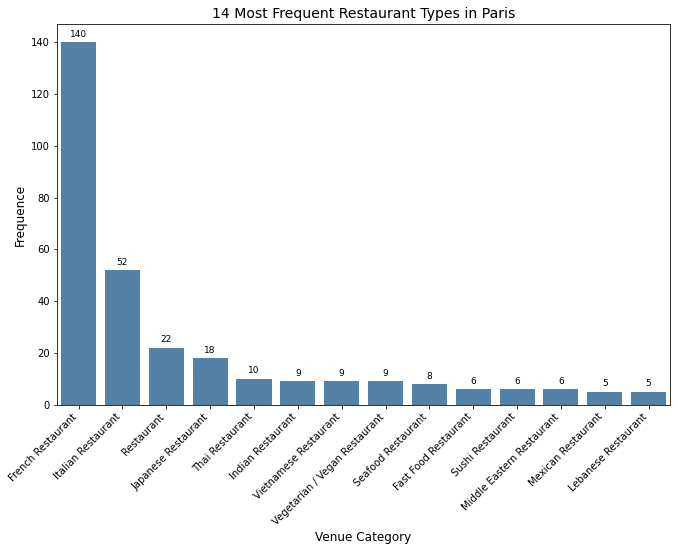

In [ ]:
fig = plt.figure(figsize=(11,7))
fig = sns.barplot(x='venue_category',y='counts',data=df_counts[0:14],color='steelblue')
plt.title('14 Most Frequent Restaurant Types in Paris', fontsize=14)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Frequence", fontsize=12)
plt.xticks(rotation=45,  horizontalalignment='right')

for bar in fig.patches:
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    fig.annotate(format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', 
                 va='center',
                 size=9, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig("14 Most Frequent Restaurant Types in Paris.png")

plt.show()

### ***We note respectively that the French and Italian restaurants are well and truly in the majority, followed by the Asian restaurants ( Japan in the lead)***

#Analyzing each neigborhood

In [ ]:
# one hot encoding
p_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
p_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [p_onehot.columns[-1]] + list(p_onehot.columns[:-1])
p_onehot = p_onehot[fixed_columns]

p_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Bakery,Bar,Basque Restaurant,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,EV Charging Station,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Laundromat,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Opera House,Outdoor Sculpture,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roman Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# check dataframe shape

In [ ]:
# check dataframe shape
print(f'New dataframe has {p_onehot.shape[0]} rows, and {p_onehot.shape[1]} columns')

New dataframe has 1048 rows, and 200 columns


#  Let's now group rows by neighborhood and take the mean of the frequency of occurrence of each business category

In [ ]:
p_grouped = p_onehot.groupby('Neighborhood').mean().reset_index()
p_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Bakery,Bar,Basque Restaurant,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,EV Charging Station,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Laundromat,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Opera House,Outdoor Sculpture,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roman Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.021739,0.021739,0.00,0.000000,0.000000,0.021739,0.043478,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.021739,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.043478,0.000000,0.000000,0.021739,0.000000,0.00,0.000000,0.021739,0.00,0.000000,0.000000,0.021739,0.000000,0.0000,0.021739,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.021739,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.0000,0.021739,0.000000,0.000000,0.000000,0.195652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.021739,0.021739,0.065217,0.021739,0.000000,0.021739,0.00,0.00,0.021739,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0000,0.021739,0.000000,0.000000,0.000000,0.021739,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.021739,0.000000,0.021739,0.021739,0

In [ ]:
# check dataframe shape
print(f'Grouped DataFrame has {p_grouped.shape[0]} rows, {p_grouped.shape[1]} columns')

Grouped DataFrame has 18 rows, 200 columns


##Let's find out each neighborhood with its  top 5 most common venues and their associated businesses

In [ ]:
num_top_venues = 5
for hood in p_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = p_grouped[p_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.20
1              Hotel  0.07
2                Bar  0.04
3       Burger Joint  0.04
4  Indian Restaurant  0.02


----Bourse----
                 venue  freq
0    French Restaurant  0.10
1         Cocktail Bar  0.05
2                Hotel  0.05
3  Japanese Restaurant  0.04
4               Bistro  0.04


----Butte-Montmartre----
                       venue  freq
0                        Bar  0.16
1          French Restaurant  0.16
2  Middle Eastern Restaurant  0.04
3         Italian Restaurant  0.04
4                Pizza Place  0.03


----Buttes-Chaumont----
                venue  freq
0   French Restaurant  0.28
1                Park  0.06
2          Restaurant  0.06
3  Italian Restaurant  0.06
4                Pool  0.06


----Entrepôt----
               venue  freq
0  French Restaurant  0.10
1             Bistro  0.08
2              Hotel  0.06
3        Coffee Shop  0.05
4               Café  0.04


----G

####***We note that in almost all areas of Paris, French restaurants remain in first position of the top 5, followed by two foreign culinary specialties, namely Italian and Japanese restaurants respectively***

#Let's put that into dataframe

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = p_grouped['Neighborhood']

for ind in np.arange(p_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(p_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Burger Joint,Bar,Yoga Studio,Concert Hall,Salon / Barbershop,Steakhouse,Sporting Goods Shop,Boutique
1,Bourse,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Plaza,Coffee Shop,Clothing Store,Italian Restaurant,Bakery
2,Butte-Montmartre,French Restaurant,Bar,Middle Eastern Restaurant,Italian Restaurant,Sandwich Place,Supermarket,Japanese Restaurant,Café,Bistro,Convenience Store
3,Buttes-Chaumont,French Restaurant,Pool,Restaurant,Park,Italian Restaurant,Thai Restaurant,Pizza Place,Coffee Shop,Scenic Lookout,Café
4,Entrepôt,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Pizza Place,Restaurant,Indian Restaurant,Bar,Breakfast Spot


#Cluster Neighborhoods
###***Let's run k-means to cluster our neighborhoods. But before, let's use Silhouette method to find the ideal k number of groups :***

####We use here the solhouette method to determine the ideal number k of clusters available in our dataset:
####1- A score close to +1 indicates a correct membership of a data point to its cluster.
####2- A score close to 0 indicates a membership of a point in the border between two clusters.
####3- A score close to -1 indicates a distant membership of a data point to its true cluster.


In [ ]:
p_grouped_cluster = p_grouped.drop('Neighborhood', axis=1)

k_ideal = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, k_ideal+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(p_grouped_cluster)
    cluster_labels = kmeans.labels_
        
    silhouette_avg = silhouette_score(p_grouped_cluster, cluster_labels)
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")  

For n_clusters: 2, average silhouette score: 0.680
For n_clusters: 3, average silhouette score: 0.487
For n_clusters: 4, average silhouette score: 0.169
For n_clusters: 5, average silhouette score: 0.118
For n_clusters: 6, average silhouette score: 0.116
For n_clusters: 7, average silhouette score: 0.110
For n_clusters: 8, average silhouette score: 0.122
For n_clusters: 9, average silhouette score: 0.072
For n_clusters: 10, average silhouette score: 0.076



###***We see that the score = 0.681 is closer to +1 and corresponds to k =2 clusters : k = 2 is the ideal number of clusters to our dataframe***

In [ ]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0).fit(p_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:17] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

###Create a new dataframe that includes the cluster and


In [ ]:
#Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:

p_merged = df_paris
# merge paris_grouped with paris data to add latitude/longitude for each neighborhood
p_merged = p_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

p_merged.head(16) # check the last columns!

,Name,Population(2017),Density(2017),Peak of population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,100196,17924,1861,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Cosmetics Shop,Bar,Museum,Boutique
1,Bourse,100196,17924,1861,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Plaza,Coffee Shop,Clothing Store,Italian Restaurant,Bakery
2,Temple,100196,17924,1861,31.098207,-97.342785,0.0,Bar,Train Station,Italian Restaurant,History Museum,Bus Station,Brewery,Snack Place,Burger Joint,Skate Park,Park
3,Hôtel-de-Ville,100196,17924,1861,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Pub,Ice Cream Shop,Movie Theater,Museum,Clothing Store,Mediterranean Restaurant
4,Panthéon,59631,23477,1911,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Restaurant,Church
5,Luxembourg,41976,19524,1911,49.815868,6.129675,0.0,Racetrack,Bus Stop,Bathing Area,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,52193,12761,1926,48.861596,2.317909,0.0,French Restaurant,Plaza,Pedestrian Plaza,Food Truck,Italian Restaurant,Hotel,Bistro,Beer Garden,Smoke Shop,Café
7,Élysée,37368,9631,1891,4.753042,-54.044953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Opéra,60071,27556,1901,48.876019,2.339962,0.0,French Restaurant,Hotel,Bakery,Bar,Burger Joint,Wine Bar,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Tea Room
9,Entrepôt,90836,31431,1881,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Pizza Place,Restaurant,Indian Restaurant,Bar,Breakfast Spot


#### Our data set does not seem to be very clean: let's chech that 

In [ ]:
print('We have',p_merged.shape[0],'rows and',p_merged.shape[1],'columns' )
print(p_merged.info())

We have 20 rows and 17 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    20 non-null     object 
 1   Population(2017)        20 non-null     int64  
 2   Density(2017)           20 non-null     object 
 3   Peak of population      20 non-null     object 
 4   Latitude                20 non-null     float64
 5   Longitude               20 non-null     float64
 6   Cluster Labels          18 non-null     float64
 7   1st Most Common Venue   18 non-null     object 
 8   2nd Most Common Venue   18 non-null     object 
 9   3rd Most Common Venue   18 non-null     object 
 10  4th Most Common Venue   18 non-null     object 
 11  5th Most Common Venue   18 non-null     object 
 12  6th Most Common Venue   18 non-null     object 
 13  7th Most Common Venue   18 non-null     object 
 14  8th Most Comm

#Indeed, we notice that we have a total of 20 rows in our dataset of which only 18 are non-null. We so have missing values: Let's delete them

In [ ]:
# Let's drop 7th and 15th rows where there are missing values
p_merged.drop(p_merged.index[[7,15]],axis = 0,inplace=True)

In [ ]:
p_merged

,Name,Population(2017),Density(2017),Peak of population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,100196,17924,1861,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Cosmetics Shop,Bar,Museum,Boutique
1,Bourse,100196,17924,1861,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Plaza,Coffee Shop,Clothing Store,Italian Restaurant,Bakery
2,Temple,100196,17924,1861,31.098207,-97.342785,0.0,Bar,Train Station,Italian Restaurant,History Museum,Bus Station,Brewery,Snack Place,Burger Joint,Skate Park,Park
3,Hôtel-de-Ville,100196,17924,1861,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Pub,Ice Cream Shop,Movie Theater,Museum,Clothing Store,Mediterranean Restaurant
4,Panthéon,59631,23477,1911,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Restaurant,Church
5,Luxembourg,41976,19524,1911,49.815868,6.129675,0.0,Racetrack,Bus Stop,Bathing Area,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,52193,12761,1926,48.861596,2.317909,0.0,French Restaurant,Plaza,Pedestrian Plaza,Food Truck,Italian Restaurant,Hotel,Bistro,Beer Garden,Smoke Shop,Café
8,Opéra,60071,27556,1901,48.876019,2.339962,0.0,French Restaurant,Hotel,Bakery,Bar,Burger Joint,Wine Bar,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Tea Room
9,Entrepôt,90836,31431,1881,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Pizza Place,Restaurant,Indian Restaurant,Bar,Breakfast Spot
10,Popincourt,147470,40183,1911,48.858416,2.379703,0.0,French Restaurant,Café,Cocktail Bar,Bar,Restaurant,Pastry Shop,Bistro,Italian Restaurant,Bakery,Japanese Restaurant


In [ ]:
# We now see that we have 18 rows
p_merged.shape

(18, 17)

In [ ]:
# Let's check the informations about missings values
p_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    18 non-null     object 
 1   Population(2017)        18 non-null     int64  
 2   Density(2017)           18 non-null     object 
 3   Peak of population      18 non-null     object 
 4   Latitude                18 non-null     float64
 5   Longitude               18 non-null     float64
 6   Cluster Labels          18 non-null     float64
 7   1st Most Common Venue   18 non-null     object 
 8   2nd Most Common Venue   18 non-null     object 
 9   3rd Most Common Venue   18 non-null     object 
 10  4th Most Common Venue   18 non-null     object 
 11  5th Most Common Venue   18 non-null     object 
 12  6th Most Common Venue   18 non-null     object 
 13  7th Most Common Venue   18 non-null     object 
 14  8th Most Common Venue   18 non-null     obje

##Let's see the resulting clusters with folium map

In [ ]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(p_merged['Latitude'],
                                  p_merged['Longitude'],
                                  p_merged['Name'], 
                                  p_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster+1)+')', parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,

                        # We had a error here: «cluster» behaved like float rather than an integer:
                        # We fixed that by introducing the int() methode
                        color=rainbow[int(cluster)-1], 
                        fill=True,
                        fill_color=rainbow[int(cluster)-1],
                        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#Examine each clusters

### Let's examine each cluster and determine the discriminating site categories that distinguish each cluster.

# ***Cluster 1***

In [ ]:
p_merged.loc[p_merged['Cluster Labels'] == 0, p_merged.columns[[0] + list(range(2, p_merged.shape[1]))]]

,Name,Density(2017),Peak of population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,17924,1861,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Cosmetics Shop,Bar,Museum,Boutique
1,Bourse,17924,1861,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Plaza,Coffee Shop,Clothing Store,Italian Restaurant,Bakery
2,Temple,17924,1861,31.098207,-97.342785,0.0,Bar,Train Station,Italian Restaurant,History Museum,Bus Station,Brewery,Snack Place,Burger Joint,Skate Park,Park
3,Hôtel-de-Ville,17924,1861,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Pub,Ice Cream Shop,Movie Theater,Museum,Clothing Store,Mediterranean Restaurant
4,Panthéon,23477,1911,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Restaurant,Church
5,Luxembourg,19524,1911,49.815868,6.129675,0.0,Racetrack,Bus Stop,Bathing Area,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,12761,1926,48.861596,2.317909,0.0,French Restaurant,Plaza,Pedestrian Plaza,Food Truck,Italian Restaurant,Hotel,Bistro,Beer Garden,Smoke Shop,Café
8,Opéra,27556,1901,48.876019,2.339962,0.0,French Restaurant,Hotel,Bakery,Bar,Burger Joint,Wine Bar,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Tea Room
9,Entrepôt,31431,1881,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Pizza Place,Restaurant,Indian Restaurant,Bar,Breakfast Spot
10,Popincourt,40183,1911,48.858416,2.379703,0.0,French Restaurant,Café,Cocktail Bar,Bar,Restaurant,Pastry Shop,Bistro,Italian Restaurant,Bakery,Japanese Restaurant


####***The predominant restaurants (French and Italian restaurants) are in the first group. They are closely followed by the Japanese restaurants in second position***

# ***Cluster 2***

In [ ]:
p_merged.loc[p_merged['Cluster Labels'] == 1, p_merged.columns[[0] + list(range(2, p_merged.shape[1]))]]

,Name,Density(2017),Peak of population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reuilly,865721729,1962,49.07814,1.2238,1.0,Construction & Landscaping,Yoga Studio,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant


### ***The second group corresponds mainly to the first common venue of Reuilly, where there are mainly companies of construction and landscaping, and yoga studio (in the 2nd most common venue)***